<a href="https://colab.research.google.com/github/yethu-KL29/Hackathon-Loan-Prediction/blob/main/Loan_Prediction_CLustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem statement

Optimize the Loan eligibility process
Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [ ]:
import pandas as pd

data  = pd.read_csv('/content/Train_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#Data Preprocessing

In [ ]:
#filling missing values
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Fill missing values
imputer = SimpleImputer(strategy='mean')
data['LoanAmount'] = imputer.fit_transform(data[['LoanAmount']])

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
data_copy = data.copy()

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
scaled_data = pd.DataFrame(scaled_features, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

In [ ]:
# Drop the original numerical columns
data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1, inplace=True)

# Concatenate the scaled features with the original data
data = pd.concat([data, scaled_data], axis=1)

In [ ]:
data['Loan_Amount_Term'].unique()

array([ 0.27664167, -3.4119139 , -1.56763612,         nan, -2.48977501,
       -4.33405279, -0.64549722,  2.12091945, -4.70290835, -3.96519724,
       -5.07176391])

In [ ]:
data.drop('Loan_ID' , axis=1, inplace=True)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,0,0,1.0,2,1,0.072991,-0.554487,0.000000,0.276642
1,1,1,1,0,0,1.0,0,0,-0.134412,-0.038732,-0.219273,0.276642
2,1,1,0,0,1,1.0,2,1,-0.393747,-0.554487,-0.957641,0.276642
3,1,1,0,1,0,1.0,2,1,-0.462062,0.251980,-0.314547,0.276642
4,1,0,0,0,0,1.0,2,1,0.097728,-0.554487,-0.064454,0.276642


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   Credit_History     564 non-null    float64
 6   Property_Area      614 non-null    int64  
 7   Loan_Status        614 non-null    int64  
 8   ApplicantIncome    614 non-null    float64
 9   CoapplicantIncome  614 non-null    float64
 10  LoanAmount         614 non-null    float64
 11  Loan_Amount_Term   600 non-null    float64
dtypes: float64(5), int64(6), object(1)
memory usage: 57.7+ KB


In [ ]:
data['Dependents']  = pd.to_numeric(data['Dependents'], errors='coerce')

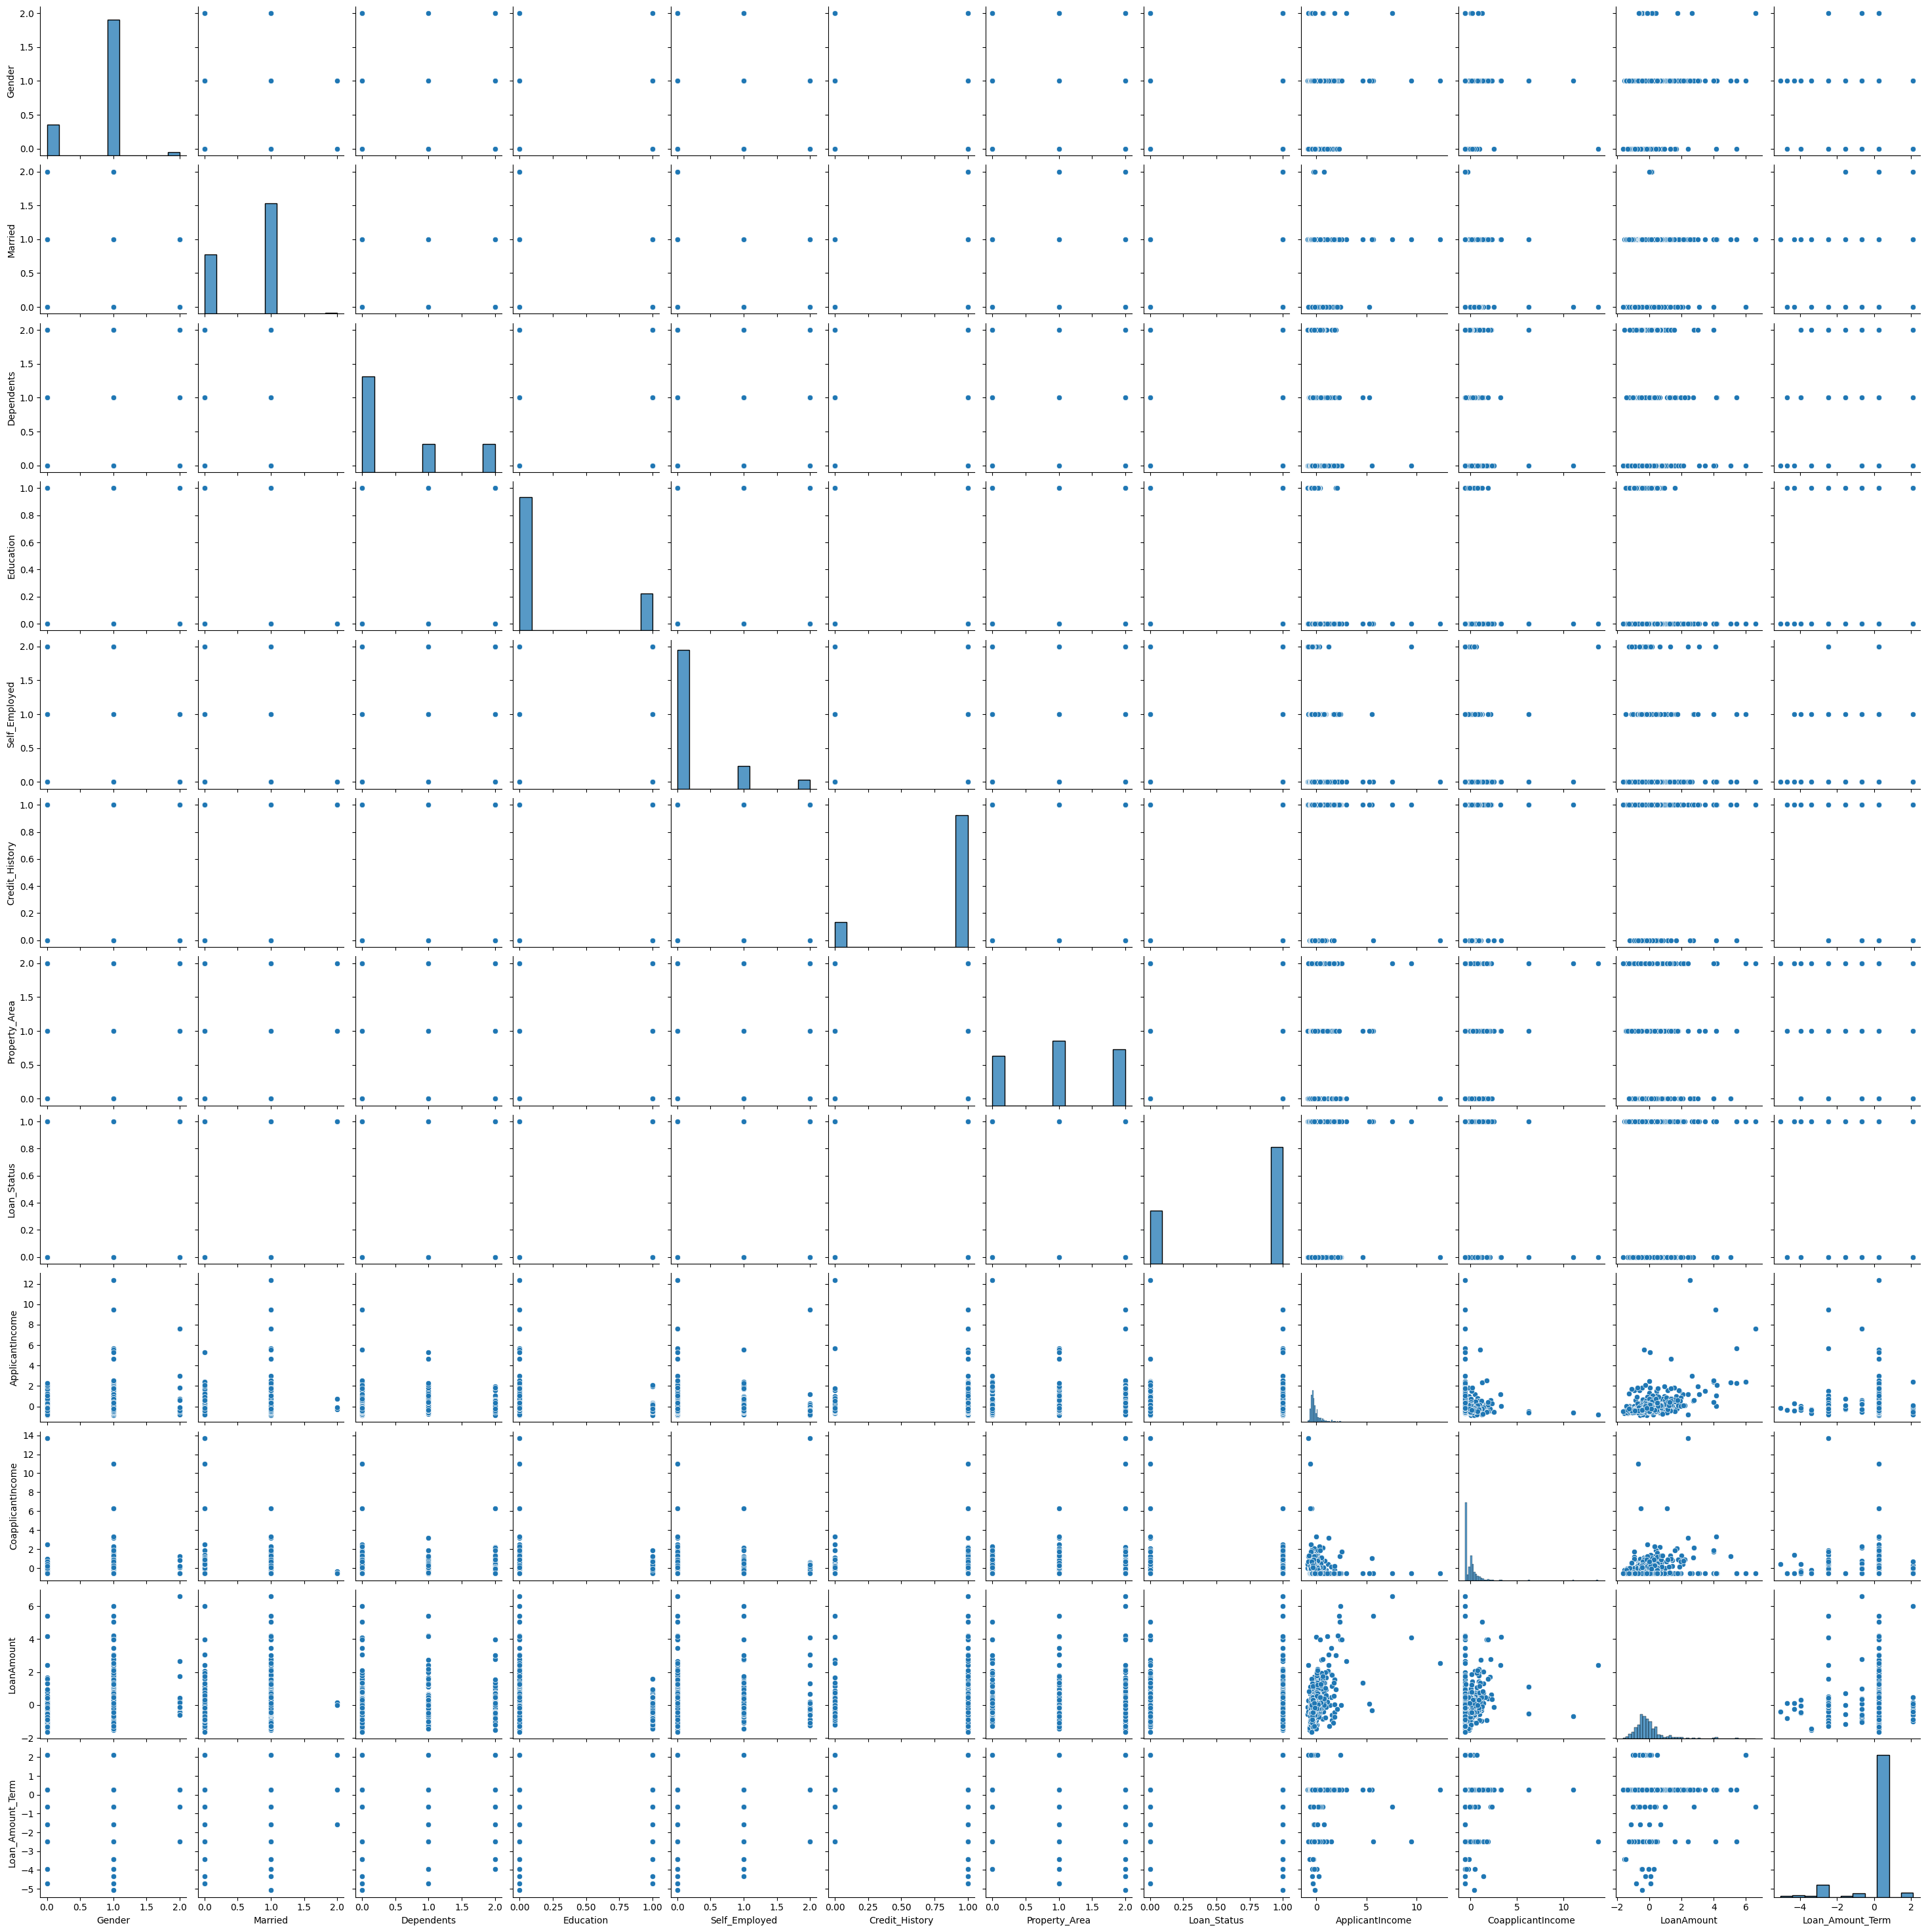

In [ ]:
import seaborn as sns

sns.pairplot(data)

<Axes: >

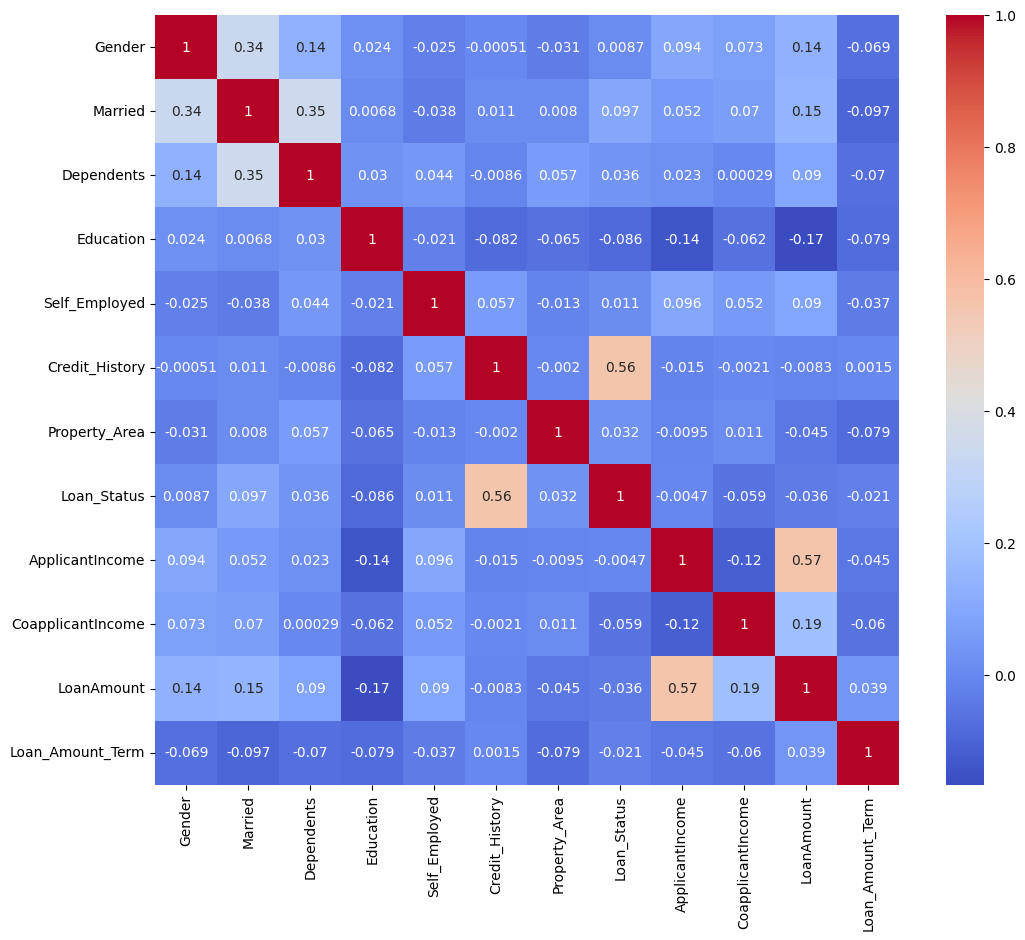

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Credit_History', ylabel='Loan_Status'>

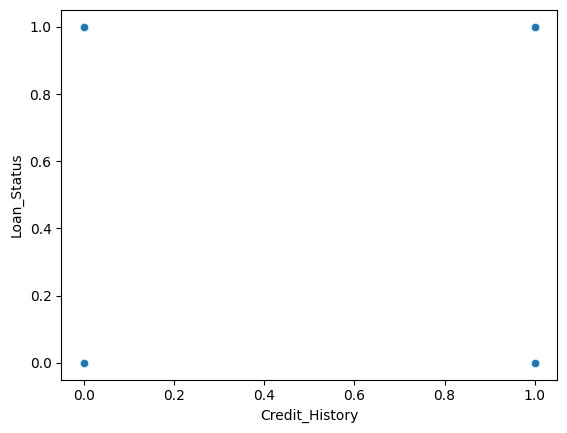

In [ ]:
sns.scatterplot(x = data['Credit_History'] , y=data['Loan_Status'])

In [ ]:
# Mean
mean_applicant_income = data['ApplicantIncome'].mean()
print(f'Mean ApplicantIncome: {mean_applicant_income}')

# Median
median_applicant_income = data['ApplicantIncome'].median()
print(f'Median ApplicantIncome: {median_applicant_income}')

# Mode
mode_applicant_income = data['ApplicantIncome'].mode()[0]
print(f'Mode ApplicantIncome: {mode_applicant_income}')

Mean ApplicantIncome: -4.3396339724761815e-18
Median ApplicantIncome: -0.2606393150761878
Mode ApplicantIncome: -0.4756599662075529


In [ ]:
import numpy as np
# Check if the mean is effectively zero
mean_applicant_income = -4.3396339724761815e-18
is_mean_zero = np.isclose(median_applicant_income, 0, atol=1e-10)

print(f'Is the mean effectively zero? {is_mean_zero}')

Is the mean effectively zero? False


<ipython-input-21-3635faea6679>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

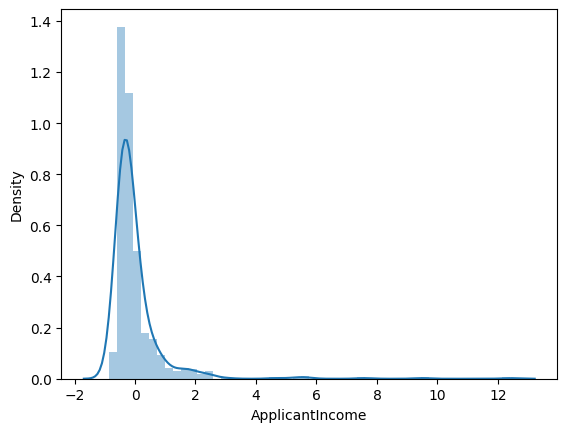

In [ ]:
sns.distplot(data['ApplicantIncome'])

#more centric plot and kurtosis is there bcause more taildness..............

<Axes: >

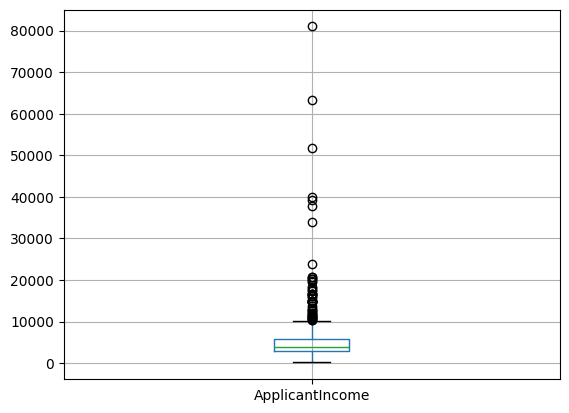

In [ ]:
data_copy.boxplot(column=['ApplicantIncome']) ## before standardisation


<Axes: >

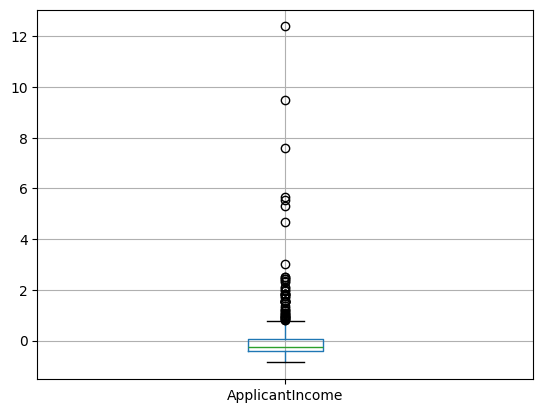

In [ ]:
data.boxplot(column=['ApplicantIncome']) #after standardusation

<Axes: xlabel='ApplicantIncome', ylabel='Loan_Status'>

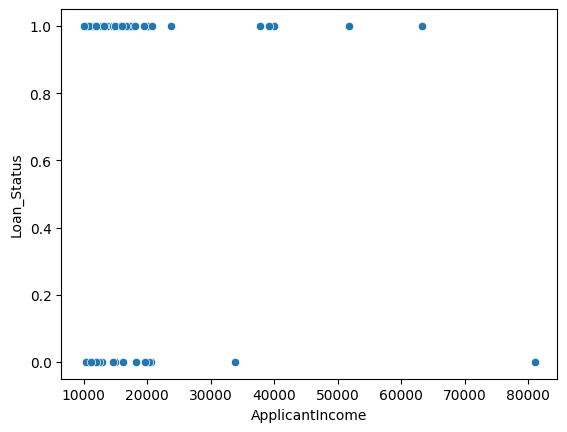

In [ ]:
greater_1 = data_copy[data_copy['ApplicantIncome'] > 10000]
sns.scatterplot(x=greater_1['ApplicantIncome'], y=greater_1['Loan_Status'])

In [ ]:
data_copy['Credit_History'].unique()

array([ 1.,  0., nan])

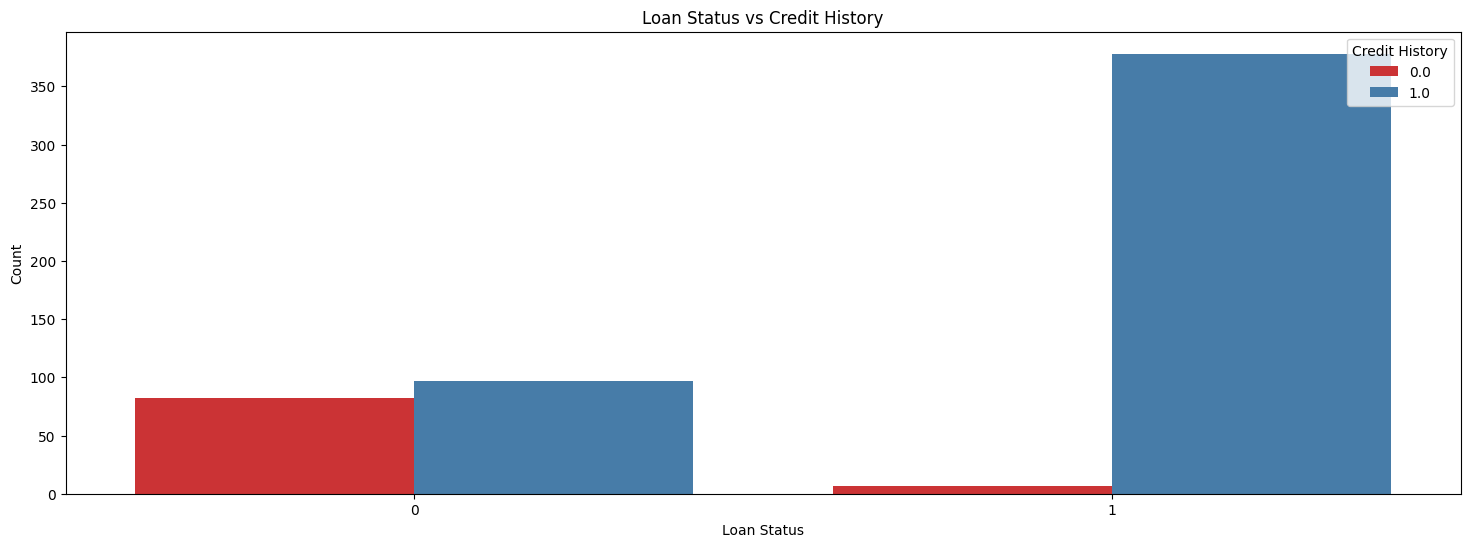

In [ ]:
import matplotlib.pyplot as plt

# Count plot for Loan_Status vs Credit_History
plt.figure(figsize=(18,6))
sns.countplot(x='Loan_Status', hue='Credit_History', data=data, palette='Set1')
plt.title('Loan Status vs Credit History')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Credit History', loc='upper right')
plt.show()

<Axes: >

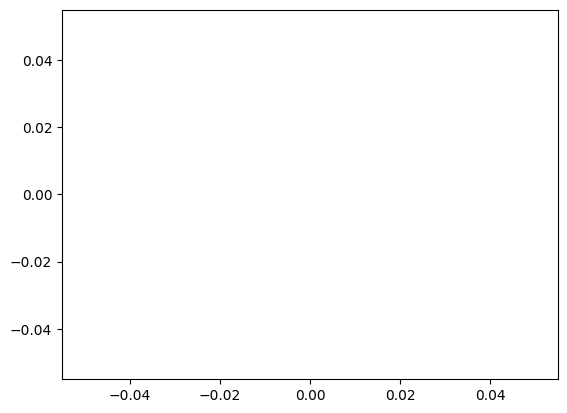

In [ ]:
sns.histplot()

In [ ]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table for Credit_History vs Loan_Status
contingency_table = pd.crosstab(data['Credit_History'], data['Loan_Status'])
contingency_table

Loan_Status,0,1
Credit_History,,
0.0,82,7
1.0,97,378


In [ ]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table for Credit_History vs Loan_Status
contingency_table = pd.crosstab(data['Credit_History'], data['Loan_Status'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between Credit History and Loan Status.")
else:
    print("Fail to reject the null hypothesis: No significant association between Credit History and Loan Status.")

Chi-Square Statistic: 174.63729658142535
P-value: 7.184759548750746e-40
Degrees of Freedom: 1
Expected Frequencies: 
[[ 28.2464539  60.7535461]
 [150.7535461 324.2464539]]
Reject the null hypothesis: There is a significant association between Credit History and Loan Status.


In [ ]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table for Credit_History vs Loan_Status
contingency_table = pd.crosstab(data['Gender'], data['Loan_Status'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between Credit History and Loan Status.")
else:
    print("Fail to reject the null hypothesis: No significant association between Credit History and Loan Status.")


Chi-Square Statistic: 0.5558960103285638
P-value: 0.7573361980618397
Degrees of Freedom: 2
Expected Frequencies: 
[[ 35.0228013   76.9771987 ]
 [152.91205212 336.08794788]
 [  4.06514658   8.93485342]]
Fail to reject the null hypothesis: No significant association between Credit History and Loan Status.


In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0.0,0,0,1.0,2,1,0.072991,-0.554487,0.000000,0.276642
1,1,1,1.0,0,0,1.0,0,0,-0.134412,-0.038732,-0.219273,0.276642
2,1,1,0.0,0,1,1.0,2,1,-0.393747,-0.554487,-0.957641,0.276642
3,1,1,0.0,1,0,1.0,2,1,-0.462062,0.251980,-0.314547,0.276642
4,1,0,0.0,0,0,1.0,2,1,0.097728,-0.554487,-0.064454,0.276642


In [ ]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table for Credit_History vs Loan_Status
contingency_table = pd.crosstab(data['Self_Employed'], data['Loan_Status'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between Credit History and Loan Status.")
else:
    print("Fail to reject the null hypothesis: No significant association between Credit History and Loan Status.")


Chi-Square Statistic: 0.15849843135909122
P-value: 0.9238096679003514
Degrees of Freedom: 2
Expected Frequencies: 
[[156.35179153 343.64820847]
 [ 25.64169381  56.35830619]
 [ 10.00651466  21.99348534]]
Fail to reject the null hypothesis: No significant association between Credit History and Loan Status.


#Random Forest Classfier

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn .metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import numpy as np

# Example Data (replace with your dataset)
X = data.drop(columns=['Loan_Status'])  # Features
y = data['Loan_Status']  # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)
model2 = GradientBoostingClassifier(random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

# Train the final model on the entire training set
model.fit(X_train, y_train)
# model2.fit(X_train, y_train)
# Evaluate the final model on the test set
test_score = model.score(X_test, y_test)
print(f"Test Set Accuracy: {test_score}")

y_pred = model.predict(X_test)
y_pred2  = model.predict(X_test)
print(classification_report(y_test, y_pred2))

Cross-Validation Scores: [0.87878788 0.7755102  0.74489796 0.81632653 0.79591837]
Mean CV Score: 0.8022881880024737
Test Set Accuracy: 0.7723577235772358
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



In [ ]:
# Assuming y_test and y_pred are your actual and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a DataFrame for better visualization with labels
cm_df = pd.DataFrame(cm, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                  18                  25
Actual Positive                   3                  77


In [ ]:
Test_Data = pd.read_csv('/content/Test_Data.csv')
Test_Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# from sklearn.inspection import permutation_importance

# # Compute permutation feature importance
# perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)

# # Create a DataFrame for visualization
# perm_importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': perm_importance.importances_mean
# }).sort_values(by='Importance', ascending=False)

# # Plot permutation importances
# plt.figure(figsize=(10, 6))
# plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'])
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Permutation Feature Importances')
# plt.gca().invert_yaxis()
# plt.show()

# New section

In [ ]:
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,66
Education,0
Self_Employed,0
Credit_History,50
Property_Area,0
Loan_Status,0
ApplicantIncome,0
CoapplicantIncome,0


In [ ]:
data['Dependents'] = imputer.fit_transform(data[['Dependents']])
data['Loan_Amount_Term'] = imputer.fit_transform(data[['Loan_Amount_Term']])
data['Credit_History'] = imputer.fit_transform(data[['Credit_History']])

In [ ]:
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Credit_History,0
Property_Area,0
Loan_Status,0
ApplicantIncome,0
CoapplicantIncome,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# # Selected features for clustering
# selected_features = ['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Property_Area']

# # Extract the selected features
# X = data[selected_features]

# # Impute missing values
# imputer = SimpleImputer(strategy='mean')  # For numerical columns
# X[['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome']] = imputer.fit_transform(X[['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome']])

# # For 'Property_Area' (categorical), we use the most frequent value (mode)
# imputer = SimpleImputer(strategy='most_frequent')
# X[['Property_Area']] = imputer.fit_transform(X[['Property_Area']])
# # Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(data)

# Add cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# Analyze the clusters
print(data.groupby('Cluster').mean())


           Gender   Married  Dependents  Education  Self_Employed  \
Cluster                                                             
0        0.830325  0.642599    0.538828   0.205776       0.232852   
1        0.916667  0.800000    0.701703   0.333333       0.283333   

         Credit_History  Property_Area  Loan_Status  ApplicantIncome  \
Cluster                                                                
0              0.844298       1.010830     0.687726        -0.014984   
1              0.822813       1.283333     0.683333         0.138354   

         CoapplicantIncome  LoanAmount  Loan_Amount_Term  
Cluster                                                   
0                -0.018035    0.012307          0.297947  
1                 0.166526   -0.113632         -2.751048  


# New section

# New section

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Apply PCA to reduce to 2 dimensions for visualization
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)
# # Add PCA components and cluster labels to the DataFrame
# data['PCA1'] = X_pca[:, 0]
# data['PCA2'] = X_pca[:, 1]

# # Plot the clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='PCA1', y='PCA2', hue='Loan_Status', palette='viridis', data=data, s=100, alpha=0.6)
# plt.title('Clusters Visualized with PCA')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.legend(title='Cluster')
# plt.show()

In [ ]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Cluster'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
# Replace 'your_dataset.csv' with the path to your dataset
# data = pd.read_csv('your_dataset.csv')

# Separate features (X) and target variable (y)
 # Last column (target variable)
X = data.drop(columns=['Loan_Status'])  # Features
y = data['Loan_Status']  # Target
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# GridSearchCV to find the best parameters for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [10, 20, 30, None],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required at each leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Initialize a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters from GridSearchCV
print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Train the model with the best parameters
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Class distribution before SMOTE:
Loan_Status
1    337
0    154
Name: count, dtype: int64

Class distribution after SMOTE:
Loan_Status
1    337
0    337
Name: count, dtype: int64
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters from GridSearchCV:
{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Confusion Matrix:
[[25 13]
 [13 72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66        38
           1       0.85      0.85      0.85        85

    accuracy                           0.79       123
   macro avg       0.75      0.75      0.75       123
weighted avg       0.79      0.79      0.79       123



In [ ]:
# Assuming y_test and y_pred are your actual and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a DataFrame for better visualization with labels
cm_df = pd.DataFrame(cm, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                  25                  13
Actual Positive                  13                  72


In [ ]:
datatest=pd.read_csv("/content/Test_Data.csv")

In [ ]:
datatest['LoanAmount'] = imputer.fit_transform(datatest[['LoanAmount']])

In [ ]:
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    datatest[column] = label_encoder.fit_transform(datatest[column])

In [ ]:
datatest['Dependents']  = pd.to_numeric(datatest['Dependents'], errors='coerce')

In [ ]:
scaled_features = scaler.transform(datatest[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

scaled_data = pd.DataFrame(scaled_features, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

In [ ]:
scaled_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.051857,-0.554487,-0.433638,0.276642
1,-0.381297,-0.041468,-0.243092,0.276642
2,-0.066097,0.061136,0.733459,0.276642
3,-0.501872,0.316278,-0.552730,0.276642
4,-0.348532,-0.554487,-0.814731,0.276642
...,...,...,...,...
362,-0.228448,0.053270,-0.397911,0.276642
363,-0.204038,-0.312000,-0.374092,0.276642
364,-0.352791,0.127145,-0.243092,0.276642
365,-0.066097,0.263950,0.138001,0.276642


In [ ]:
datasample=datatest.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1, inplace=False)

# Concatenate the scaled features with the original data
datatest_ = pd.concat([datasample, scaled_data], axis=1)

In [ ]:
datatest_.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,50
Education,0
Self_Employed,0
Credit_History,29
Property_Area,0
ApplicantIncome,0
CoapplicantIncome,0


In [ ]:
datatest_['Dependents'] = imputer.fit_transform(datatest_[['Dependents']])
datatest_['Loan_Amount_Term'] = imputer.fit_transform(datatest_[['Loan_Amount_Term']])
datatest_['Credit_History'] = imputer.fit_transform(datatest_[['Credit_History']])

In [ ]:
datatest_.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Credit_History,0
Property_Area,0
ApplicantIncome,0
CoapplicantIncome,0


In [ ]:
Loanid=datatest_["Loan_ID"]

In [ ]:
datas

In [ ]:
y_pred = best_rf.predict(datatest_.drop(columns=['Loan_Status']))

KeyError: "['Loan_Status'] not found in axis"

In [ ]:
y_pred

In [ ]:
df=pd.Series(y_pred)

In [ ]:
import pandas as pd


# Convert 1s to 'Y' and 0s to 'N'
data_converted = df.map({1: 'Y', 0: 'N'})

print("Original Series:")
print(data)

print("\nConverted Series:")
print(data_converted)

In [ ]:
Loanid

In [ ]:
import pandas as pd

# Create two Series
loan_ids = pd.Series(Loanid)
loan_status = pd.Series(data_converted)

# Create a DataFrame using the two Series
df = pd.DataFrame({
    'Loan_ID': loan_ids,
    'Loan_Status': loan_status
})

# Display the DataFrame
print(df)

In [ ]:
df.to_csv(index=False)